In [1]:
import torch
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
words = open("names.txt").read().splitlines()

In [3]:
print(f"total no. of words: {len(words)}")
print(f"min len of a word: {min(len(w) for w in words)}, max len of a word: {max(len(w) for w in words)}")
print(words[:10])

total no. of words: 55272
min len of a word: 2, max len of a word: 24
['parish', 'manhi', 'akshaykeerti', 'suran', 'tomali', 'analilia', 'gowmy', 'mahato', 'jeyarshanan', 'gauresh']


In [4]:
# creating a dictonary of teh bigrams
b = {}
for w in words:
    chs = ['<S>'] + list(w) + ['<E>'] # starting and ending tags for each word
    for ch1, ch2 in zip(chs, chs[1:]):
        bigram = (ch1, ch2)
        b[bigram] = b.get(bigram, 0) + 1  # this is same as sying b[bigram] but if bigram dosent exist then return zero

In [5]:
# sorting dict wrt to key value in reverse
sorted(b.items(), key= lambda k: -k[1]) # items() method returns tuple of key value pair, k[1] specifies to sort wrt 1st index in a tuple

[(('a', 'n'), 26233),
 (('h', 'a'), 18565),
 (('a', '<E>'), 16591),
 (('t', 'h'), 15390),
 (('s', 'h'), 14643),
 (('n', '<E>'), 13742),
 (('a', 'r'), 11142),
 (('r', 'a'), 10897),
 (('i', '<E>'), 9099),
 (('h', 'i'), 8341),
 (('n', 'a'), 8126),
 (('y', 'a'), 7738),
 (('n', 'i'), 7056),
 (('k', 'a'), 6779),
 (('<S>', 'a'), 6673),
 (('v', 'a'), 6175),
 (('m', 'a'), 5806),
 (('a', 's'), 5587),
 (('<S>', 's'), 5404),
 (('a', 't'), 5303),
 (('i', 'n'), 5257),
 (('r', 'i'), 5162),
 (('i', 't'), 4954),
 (('l', 'a'), 4635),
 (('h', '<E>'), 4626),
 (('v', 'i'), 4566),
 (('a', 'a'), 4546),
 (('i', 's'), 4452),
 (('s', 'a'), 4379),
 (('e', 'e'), 4343),
 (('<S>', 'k'), 4306),
 (('<S>', 'v'), 4164),
 (('a', 'm'), 4015),
 (('a', 'l'), 3986),
 (('<S>', 'm'), 3949),
 (('a', 'v'), 3722),
 (('<S>', 'n'), 3597),
 (('e', 's'), 3571),
 (('j', 'a'), 3435),
 (('<S>', 'r'), 3425),
 (('i', 'k'), 3390),
 (('<S>', 'p'), 3342),
 (('d', 'h'), 3106),
 (('n', 't'), 3075),
 (('e', 'n'), 3057),
 (('a', 'k'), 3050),
 (

In [6]:
# representing these bigrams in a 2D-array via torch tensors, (changing default dtype float32 to int32)
N = torch.zeros((27, 27), dtype=torch.int32) # 27x27 array such as each entry will tell us how often 2nd char follows 1st char
# above array will be constructed such as each row will represent the starting of a bigram (1st char)
# and each column will represent the ending o fthe bigram (2nd char)

In [7]:
chars = sorted(list(set(''.join(words)))) # creating a list of all the alphabets
ch_to_id = {ch:i+1 for i, ch in enumerate(chars)} # dict to map ch to respective index (look up table)
ch_to_id['<.>'] = 0 # special char to mark ending and starting of a word

# id to ch mapping
id_to_ch = {i:ch for ch, i in ch_to_id.items()}

In [8]:
print(f"char to id mapping: {ch_to_id}")
print(f"id to char mapping: {id_to_ch}")

char to id mapping: {'a': 1, 'b': 2, 'c': 3, 'd': 4, 'e': 5, 'f': 6, 'g': 7, 'h': 8, 'i': 9, 'j': 10, 'k': 11, 'l': 12, 'm': 13, 'n': 14, 'o': 15, 'p': 16, 'q': 17, 'r': 18, 's': 19, 't': 20, 'u': 21, 'v': 22, 'w': 23, 'x': 24, 'y': 25, 'z': 26, '<.>': 0}
id to char mapping: {1: 'a', 2: 'b', 3: 'c', 4: 'd', 5: 'e', 6: 'f', 7: 'g', 8: 'h', 9: 'i', 10: 'j', 11: 'k', 12: 'l', 13: 'm', 14: 'n', 15: 'o', 16: 'p', 17: 'q', 18: 'r', 19: 's', 20: 't', 21: 'u', 22: 'v', 23: 'w', 24: 'x', 25: 'y', 26: 'z', 0: '<.>'}


In [9]:
# adding the char indices to the torch tensor
for w in words:
    chs = ['<.>'] + list(w) + ['<.>']
    for ch1, ch2 in zip(chs, chs[1:]):
        i = ch_to_id[ch1] # index of 1st char
        j = ch_to_id[ch2] # index of 2nd char
        N[i, j] += 1 # the number at respective index will represent th efrequency on the char and bigram

In [10]:
N

tensor([[    0,  6673,  1745,  1044,  3047,   695,   142,  1472,  1702,   921,
          2546,  4306,  1370,  3949,  3597,   214,  3342,    17,  3425,  5404,
          2946,   656,  4164,    99,     1,  1663,   132],
        [16591,  4546,  1508,   316,  2226,   505,    55,  1588,  1746,  2156,
          2153,  3050,  3986,  4015, 26233,    23,   855,    11, 11142,  5587,
          5303,   263,  3722,   161,    66,  2788,   249],
        [   90,  1798,    37,     0,    39,   299,     0,     1,  1334,   937,
             7,     0,    12,     0,     6,   125,     2,     0,   257,     7,
             6,   220,     0,     1,     0,    43,     1],
        [   18,   204,     0,    15,     0,    26,     0,     0,  1763,    59,
             0,   118,     5,     0,     1,    23,     0,     0,     4,     4,
             3,     7,     0,     0,     0,    25,     0],
        [  401,  1887,    10,    30,   125,  1375,     0,    10,  3106,  1107,
             5,    10,    10,    91,    31,    67,   

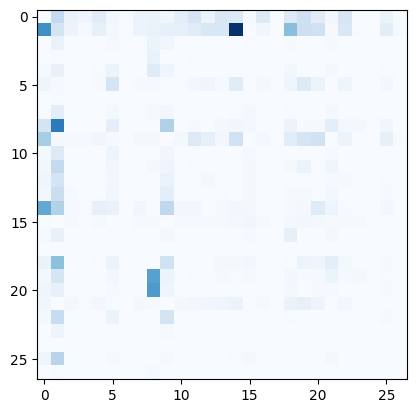

In [11]:
plt.imshow(N, cmap='Blues') # frequency distrubution represented in color intensity

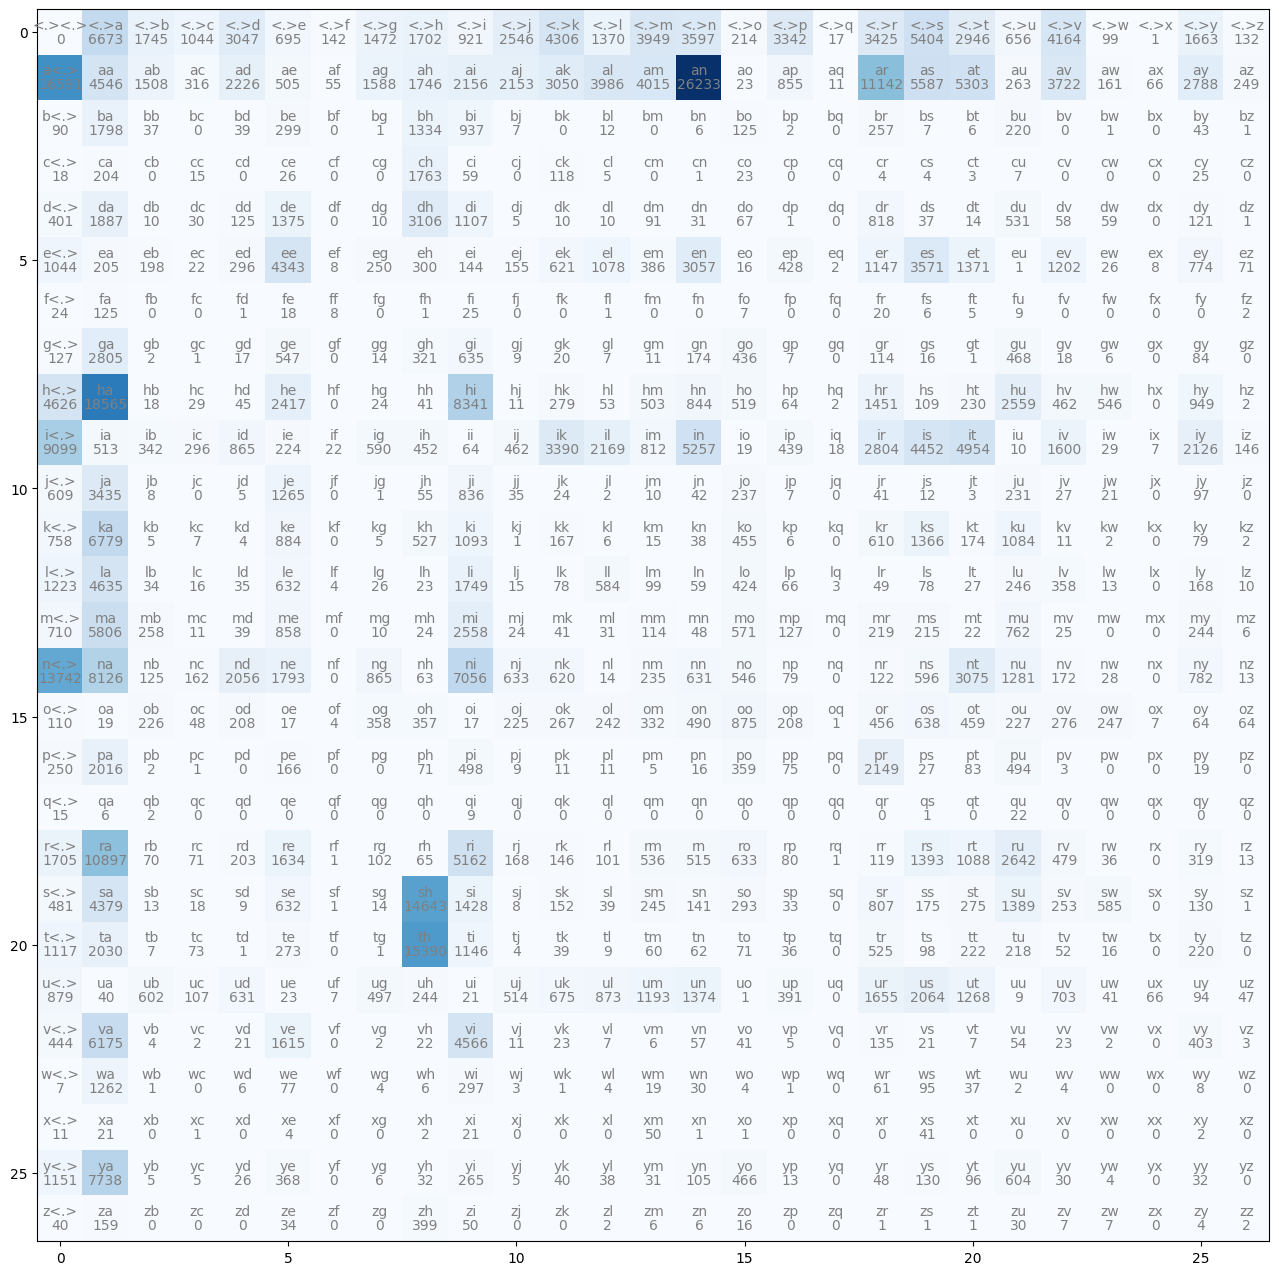

In [12]:
# better arry visualization
plt.figure(figsize=(16, 16))
plt.imshow(N, cmap='Blues')
for i in range(27):
    for j in range(27):
        ch_str = id_to_ch[i] + id_to_ch[j]
        plt.text(j, i, ch_str, ha="center", va="bottom", color="gray")
        plt.text(j, i, N[i, j].item(), ha="center", va="top", color="gray")